In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [13]:
# загрузка датасета
pizza = pd.read_csv('pizza_sales.csv', encoding='1251')
pizza

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [14]:
# duplicates checking
pizza[pizza.duplicated()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name


We don't have duplicates

In [15]:
# checking fataset info, null values and data types
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


There is no NULL values in any column, data types seem to be correct
We will carry out the following transformations:
* Add columns, by extracting the hours, month and day of the week from the date and time of the order.
* Let's set the values in date_order column to an identical  format.

In [16]:
# Let's set the values in date_order column to an identical format.
pizza['order_date'] = pd.to_datetime(pizza['order_date'], infer_datetime_format=True).dt.strftime('%Y/%m/%d')

C:\Users\Katerina\AppData\Roaming\Python\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Katerina\AppData\Roaming\Python\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Katerina\AppData\Roaming\Python\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Katerina\AppData\Roaming\Python\Python39\site-packages\pandas\core\tools\datetimes.py:10

In [17]:
# extracting the month from the date
pizza['order_month'] = pd.to_datetime(pizza.order_date).dt.month

In [18]:
# extracting the name of the weekday from the date
pizza['order_day'] =  pd.to_datetime(pizza.order_date).dt.day_name()

In [19]:
# extracting the number of the weekday from the date
pizza['order_day_number'] = pd.to_datetime(pizza['order_date']).dt.day_of_week

In [20]:
# extracting the hour order_time
pizza['order_hour'] = pd.to_datetime(pizza['order_time']).dt.hour

In [21]:
# checking the result
pizza.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_day,order_day_number,order_hour
0,1.0,1.0,hawaiian_m,1.0,2015/01/01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,Thursday,3,11
1,2.0,2.0,classic_dlx_m,1.0,2015/01/01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,Thursday,3,11
2,3.0,2.0,five_cheese_l,1.0,2015/01/01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,Thursday,3,11
3,4.0,2.0,ital_supr_l,1.0,2015/01/01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,Thursday,3,11
4,5.0,2.0,mexicana_m,1.0,2015/01/01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,Thursday,3,11


We calculate the quantity in each order and the total amount, and group the table by orders and by period of time.

In [22]:
# creating the new dateframe
orders = pizza.groupby(['order_id', 'order_month', 'order_day_number', 'order_hour']).agg({'quantity': sum, 'total_price': 'sum'}).reset_index()
orders

,order_id,order_month,order_day_number,order_hour,quantity,total_price
0,1.0,1,3,11,1.0,13.25
1,2.0,1,3,11,5.0,92.00
2,3.0,1,3,12,2.0,37.25
3,4.0,1,3,12,1.0,16.50
4,5.0,1,3,12,1.0,16.50
...,...,...,...,...,...,...
21345,21346.0,12,3,20,4.0,62.25
21346,21347.0,12,3,21,4.0,66.50
21347,21348.0,12,3,21,3.0,46.70
21348,21349.0,12,3,22,1.0,20.25


In [23]:
# let's look at descriptive statistics
orders.describe()

,order_id,order_month,order_day_number,order_hour,quantity,total_price
count,21350.000000,21350.000000,21350.000000,21350.000000,21350.000000,21350.000000
mean,10675.500000,6.423888,2.995363,16.085527,2.321967,38.307262
std,6163.358459,3.437223,1.956103,3.152723,1.825735,30.648197
min,1.000000,1.000000,0.000000,9.000000,1.000000,9.750000
25%,5338.250000,3.000000,1.000000,13.000000,1.000000,17.950000
50%,10675.500000,6.000000,3.000000,16.000000,2.000000,32.500000
75%,16012.750000,9.000000,5.000000,19.000000,3.000000,49.500000
max,21350.000000,12.000000,6.000000,23.000000,28.000000,444.200000


<AxesSubplot:>

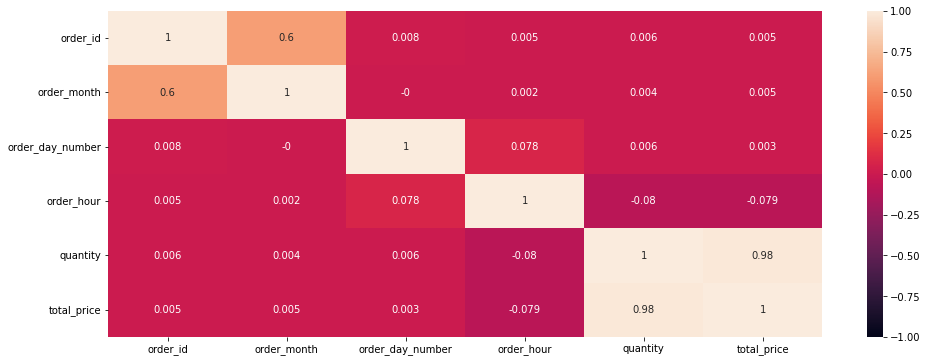

In [24]:
# let's look at the correlation for the newly formed dataset
plt.figure(figsize=(16, 6))
sns.heatmap(orders.corr().round(3), vmax=1, vmin=-1, annot=True)

<AxesSubplot:>

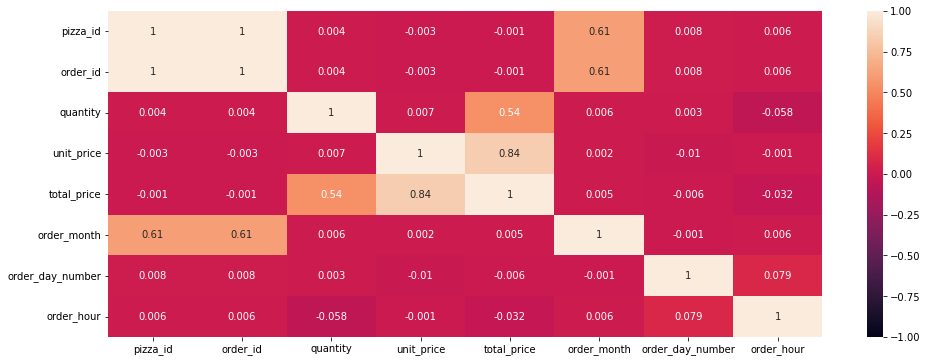

In [25]:
# let's look at the correlation of the original dataframe
pizza_corr = pizza[['pizza_id', 'order_id', 'quantity', 'unit_price', 'total_price', 'order_month', 'order_day_number', 'order_hour']]
plt.figure(figsize=(16, 6))
sns.heatmap(pizza_corr.corr().round(3), vmax=1, vmin=-1, annot=True)

We designate the correlation value >= 0.5 as significant. The following parameters correlate:
<p>'total_ price' and 'quantity' - 0.98 for orders dataset. It means that any patterns and distributions for one measure will apply to another</p> 
<p>'total_ price' and 'unit_price' - 0.84 and 'total_ price' and 'quantity' - 0.54 for pizza dataset</p>

### Style and parameters selection for graphs

In [26]:
# available styles check-up
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [27]:
# setting the style and parameters 
plt.style.use('ggplot')
params = {
    'font.size': 15,
    'axes.titlesize': 15,
    'xtick.labelsize': 12,
    'axes.labelsize': 15,
    'ytick.labelsize' : 12,
    'font.family':  'cursive',   
    'figure.figsize': [6.0, 6.0],
}
plt.rcParams.update(params)

### Qantity и total_price analysis

Text(0, 0.5, 'Quantity')

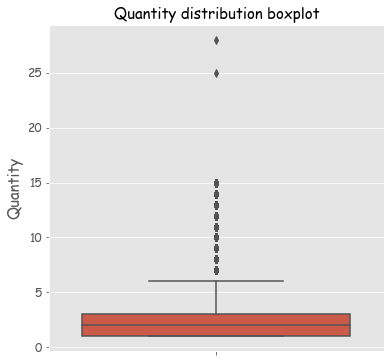

In [28]:
# boxplot for quantity
sns.boxplot(data=orders, y='quantity')
plt.title('Quantity distribution boxplot')
plt.ylabel('Quantity')

Text(0.5, 0, 'Quantity')

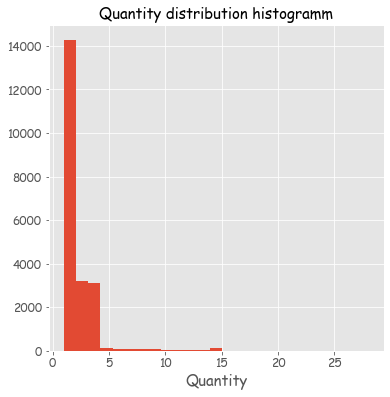

In [29]:
# quantity distribution histogramm
orders['quantity'].hist(bins=25)
plt.title('Quantity distribution histogramm')
plt.xlabel('Quantity')

25 percentile: 1 orders, median - 2 orders, 75 percentile - 3 orders, the maximum orders are with 1 pizza.

Text(0, 0.5, 'Total price')

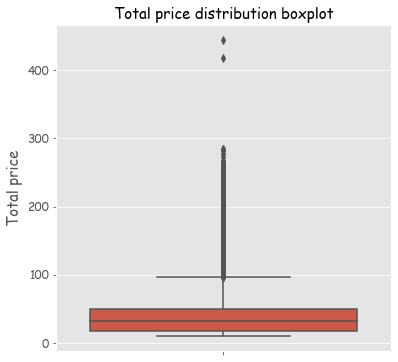

In [30]:
# boxplot for total_price
sns.boxplot(data=orders, y='total_price')
plt.title('Total price distribution boxplot')
plt.ylabel('Total price')

Text(0.5, 0, 'Total price')

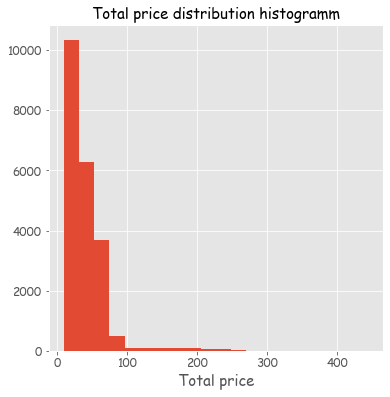

In [31]:
# histogramm for total_price
orders['total_price'].hist(bins=20)
plt.title('Total price distribution histogramm')
plt.xlabel('Total price')

25 перцентиль is 17.95, median is  32.5

### Total price distribution by time periods

Text(0, 0.5, 'Total price')

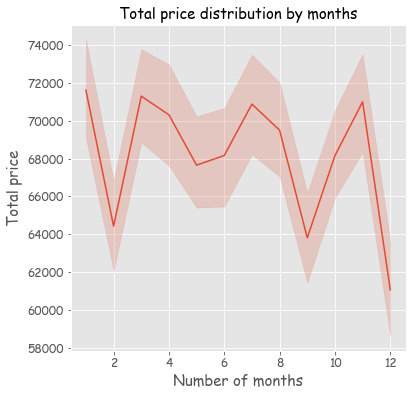

In [32]:
# Total price distribution by months
sns.lineplot(data=orders, x='order_month', y='total_price', estimator=sum)
plt.title('Total price distribution by months')
plt.xlabel('Number of months')
plt.ylabel('Total price')

Text(0, 0.5, 'Quantity')

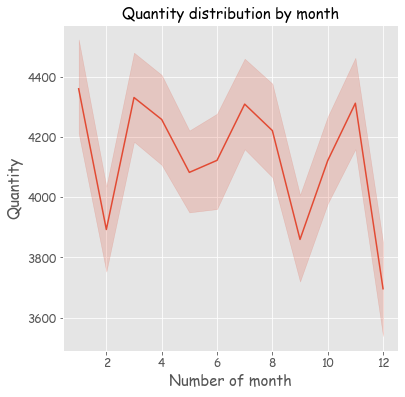

In [33]:
# quantity distribution by month
sns.lineplot(data=orders, x='order_month', y='quantity', estimator='sum')
plt.title('Quantity distribution by month')
plt.xlabel('Number of month')
plt.ylabel('Quantity')

As we predicted because of very hight correlation between quantity and total_price plots look similar.
Maximum values are in months 7, 5, 11
Minimum values are in months 12, 2, 9

Text(0, 0.5, 'Total price')

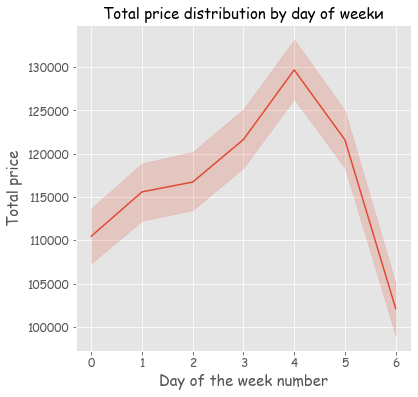

In [34]:
# total price distribution by day of the week
sns.lineplot(data=orders, x='order_day_number', y='total_price', estimator=sum)
plt.title('Total price distribution by day of weekи')
plt.xlabel('Day of the week number')
plt.ylabel('Total price')

Text(0, 0.5, 'Quantity')

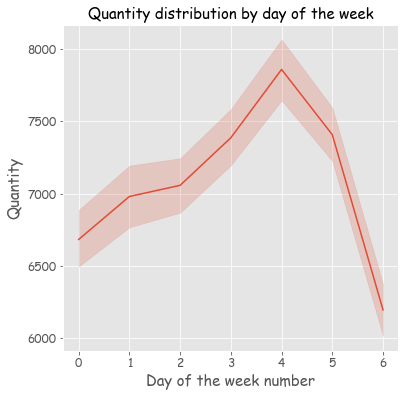

In [35]:
# quantity distribution by day of the week
sns.lineplot(data=orders, x='order_day_number', y='quantity', estimator='sum')
plt.title('Quantity distribution by day of the week')
plt.xlabel('Day of the week number')
plt.ylabel('Quantity')

The distribution of the total price and quantity are the same.
The maximum total price  and quantity are visible on day 4 - Friday, the minimum - on day 6, Sunday, additionally, the graphs increase smoothly from Monday to Friday, then smoothly go down.

Text(0, 0.5, 'Total price')

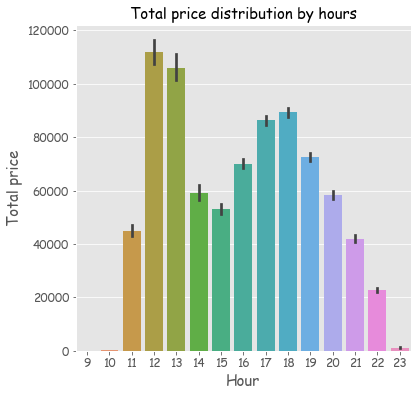

In [36]:
# total price distribution by hours
sns.barplot(data=orders, x='order_hour', y='total_price', estimator=sum)
plt.title('Total price distribution by hours')
plt.xlabel("Hour")
plt.ylabel("Total price")

Text(0, 0.5, 'Quantity')

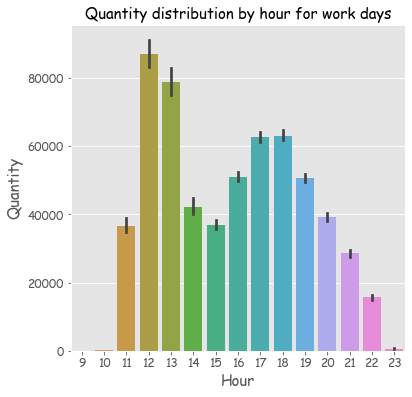

In [37]:
#  quantity distribution by hour for work days
sns.barplot(data=orders[~orders['order_day_number'].isin([5, 6])], x='order_hour', y='total_price', estimator=sum)
plt.title('Quantity distribution by hour for work days')
plt.xlabel("Hour")
plt.ylabel("Quantity")

Text(0, 0.5, 'Quantity')

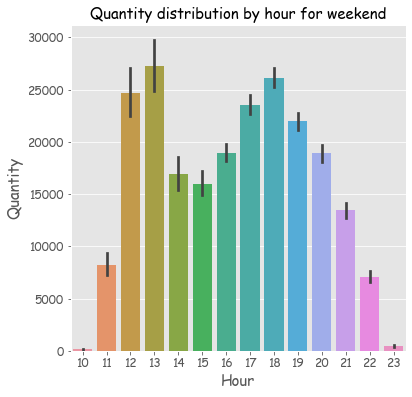

In [38]:
#  quantity distribution by hour for weekend
sns.barplot(data=orders[orders['order_day_number'].isin([5, 6])], x='order_hour', y='total_price', estimator=sum)
plt.title('Quantity distribution by hour for weekend')
plt.xlabel("Hour")
plt.ylabel("Quantity")

##### Total price value distribution is bimodal: 
* the first peak is between 12 and 14 hours, the second one is from 16 till 23,
* with a maximum value of 18 hours.

##### Also I would like to note that it is a slight difference on the graphs for weekends and weekdays: 
* for weekdays the first mode (from 12 to 14) is much higher than the second one (with a peak from 18 to 19), then for weekends the modes look equal; если для будних дней первая мода (с 12 до 14) намного выше второй (с пиком с 18 до 19), то для выходных дней моды на графике выглядят  ближе друг к другу по значениям; 
* The value decreasing   from 14 to 16 for weekends less than for weekdays, the plot is smoother.

### Total price and quantity distribution by categories

In [39]:
# creation the dataframe with quantities by categories
categories = pizza.groupby('pizza_category')['quantity'].sum()
categories

pizza_category
Chicken    11050.0
Classic    14888.0
Supreme    11987.0
Veggie     11649.0
Name: quantity, dtype: float64

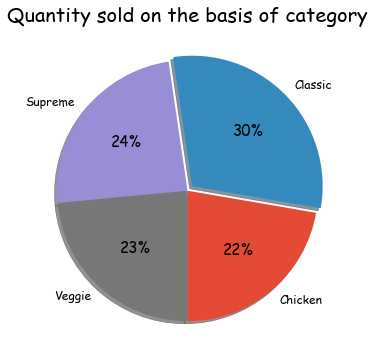

In [40]:
# pieplot
plt.figure(figsize=(6, 6))

# color_palette = sns.color_palette("Set2")
categories = pizza.groupby('pizza_category')['quantity'].sum()

plt.pie(data = categories,\
        x=categories.values, labels = categories.index, \
        explode=(0,0.05,0,0), autopct='%1.0f%%', \
        shadow=True, \
        startangle=270)
plt.title("Quantity sold on the basis of category", size=20)
plt.show()

In [41]:
# creation the dataframe with total price by categories
categories2 = pizza.groupby('pizza_category')['total_price'].sum()
categories2

pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: total_price, dtype: float64

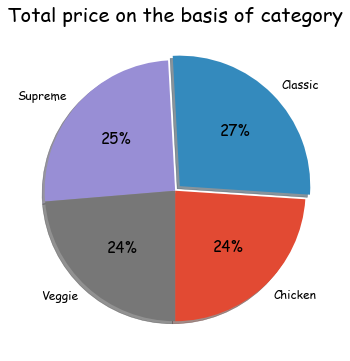

In [42]:
# pieplot 
plt.figure(figsize=(6, 6))

plt.pie(data = categories2,\
        x=categories2.values, labels = categories2.index, \
        explode=(0,0.05,0,0), autopct='%1.0f%%', \
        shadow=True, \
        startangle=270)
plt.title("Total price on the basis of category", size=20)
plt.show()

In the pie chart, we see that the Classic category has the maximum quantity sold and the maximum total price. The quantity sold and the total price for all categories are in the range from 22% to 30%.

#### The most popular moneymaking pizza

In [43]:
# dataframe with names, total price and quantity sold
names = pizza.groupby(['pizza_name']).agg({'total_price': 'sum', 'quantity': 'sum'})\
                                    .reset_index()
names_sorted = names.sort_values(by='total_price', ascending=False)

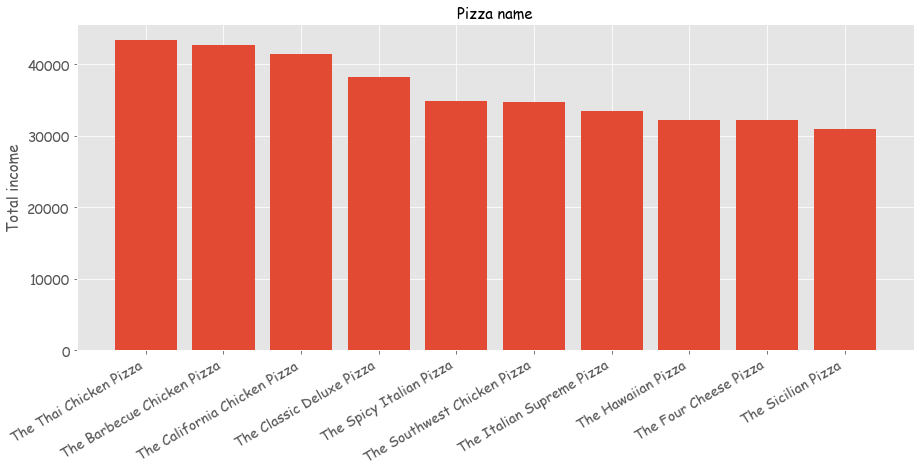

In [44]:
# income from 10 moneymaking pizzas by decreasing the value
params = {
    'xtick.labelsize': 14,
    'ytick.labelsize' : 14
}
plt.rcParams.update(params)

plt.figure(figsize=(15, 6))
plt.ylabel('Total income')
plt.title('Pizza name')

plt.xticks(rotation=30, ha = 'right')

plt.bar(names_sorted.pizza_name.iloc[:10], names_sorted.total_price.iloc[:10])
plt.show()

In [45]:
# top 5 by quantity sold
names_sorted.pizza_name.iloc[:5]

30          The Thai Chicken Pizza
0       The Barbecue Chicken Pizza
4     The California Chicken Pizza
7         The Classic Deluxe Pizza
26         The Spicy Italian Pizza
Name: pizza_name, dtype: object

In [46]:
# top 5 by income
names.sort_values(by='quantity', ascending=False)['pizza_name'].iloc[:5]

7       The Classic Deluxe Pizza
0     The Barbecue Chicken Pizza
12            The Hawaiian Pizza
20           The Pepperoni Pizza
30        The Thai Chicken Pizza
Name: pizza_name, dtype: object

### Distribution by size

In [47]:
# dataframe with sizes, quantities and total income
sizes = pizza.groupby('pizza_size').agg({'total_price': sum, 'quantity': sum}).reset_index()
sizes

,pizza_size,total_price,quantity
0,L,375318.70,18956.0
1,M,249382.25,15635.0
2,S,178076.50,14403.0
3,XL,14076.00,552.0
4,XXL,1006.60,28.0


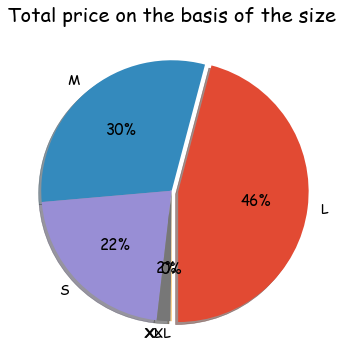

In [48]:
# построим круговую диаграмму распределения выручки по размерам
plt.figure(figsize=(6, 6))

plt.pie(data = sizes,\
        x=sizes.total_price, labels = sizes.pizza_size, \
        explode=(0.05,0,0,0,0), autopct='%1.0f%%', \
        shadow=True, \
        startangle=270)
plt.title("Total price on the basis of the size", size=20)
plt.show()

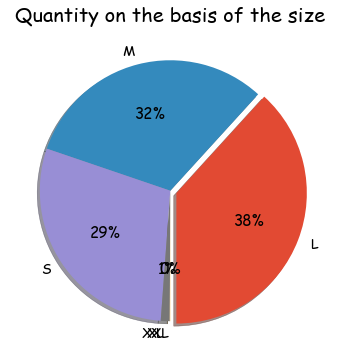

In [49]:
# построим круговую диаграмму распределения размеров по количеству проданных
plt.figure(figsize=(6, 6))

plt.pie(data = sizes,\
        x=sizes.quantity, labels = sizes.pizza_size, \
        explode=(0.05,0,0,0,0), autopct='%1.0f%%', \
        shadow=True, \
        startangle=270)
plt.title("Quantity on the basis of the size", size=20)
plt.show()

**L size** has maximus quantity sold 38% of total quantity and maxixum income 46% of total</br>
**M size** has 30% of total income and 32% of quantity</br>
**S size** has 22 f total income and 29% of quantity</br>
**XXL и XL sizes** have less that 1% for each paramether</br>


### **Conclusions**
##### <strong>Overview of total price and quantity sold by parameters..</strong>
* <strong>by months:</strong> there is consistent month-to-month growth.
* <strong>by days of week:</strong> the distribution of the total price and quantity are the same. The maximum total price  and quantity are visible on day 4 - Friday, the minimum - on day 6, Sunday, additionally, the graphs increase smoothly from Monday to Friday, then smoothly go down.
* <strong>by hours:</strong> the distribution is bimodal: the first peak is between 12 and 14 hours, the second one is from 16 till 23, with a maximum value of 18 hours. There is a visible difference on the graphs for weekends and weekdays: for weekdays the first mode (from 12 to 14) is much higher than the second one (with a peak from 18 to 19), then for weekends the modes look equal; если для будних дней первая мода (с 12 до 14) намного выше второй (с пиком с 18 до 19), то для выходных дней моды на графике выглядят  ближе друг к другу по значениям; the value decreasing  from 14 to 16 for weekends less than for weekdays, the plot is smoother.
* <strong>by category:</strong> the total price and the quantity sold for all categories is between 22% and 30% with the maximum value for the Classic category.
* <strong>by size:</strong> L-size has maximus quantity sold 38% of total quantity and maxixum income 46% of total, M-size has 30% of total income and 32% of quantity, S-size has 22% of total income and 29% of quantity and XXL and X sizes have together less that 1% of each paramether.

<strong>Top 5 popular pizzas:</strong>
1.  The Classic Deluxe Pizza
2.  The Barbecue Chicken Pizza
3.  The Hawaiian Pizza
4.  The Pepperoni Pizza
5.  The Thai Chicken Pizza


<strong>Top 5 moneymaking pizzas:</strong>
1. The Thai Chicken Pizza
2. The Barbecue Chicken Pizza
3. The California Chicken Pizza
4. The Classic Deluxe Pizza
5. The Spicy Italian Pizza


